In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/scr/aldea/kgutenbrunner/working/xrRNA_design/MBFV_design/seqs/designed_seqs.csv', delimiter=';')

In [3]:
counts = {'A':[], 'C':[], 'G':[], 'U':[]}
nts = 'AUCG'
for i in range(len(df)):
    seq = df.iloc[i]['sequence'].replace('-', '')
    n=len(seq)
    for nt in nts:
        counts[nt].append(seq.count(nt)/ n) 

for nt in nts:
    df[nt] = counts[nt]

In [4]:
df

,id,sequence,structure,len,MFE,freq,gc,model,date,A,U,C,G
0,0,AGUCAGGCCCGAC-UUCUCU--GUCGGCCACGAUC-U--------G...,...((((((((((......))))).(((((((.......)))))))...,64,-22.2,0.620,0.609,"mc, 100 000, first tries - max stem (5)",05/29/2024,0.140625,0.250000,0.343750,0.265625
1,1,UGUCAGGCCCGC-UUCAAU--GCGGACACC----C------UAAA-...,...(((((((((......)))).((((........))))..)))))...,55,-17.6,0.880,0.509,"mc, 100 000, MBFV testing - no constraint - lo...",06/03/2024,0.163636,0.327273,0.272727,0.236364
2,2,UGUCAGCCCCG--GACAA----CGGACACCCC--GACACC-AAA--...,...((((((((.....))).((((((..........))))))..))...,58,-21.1,0.880,0.552,"mc, 100 000, MBFV testing - no constraint - me...",06/03/2024,0.241379,0.206897,0.293103,0.258621
3,3,UGUCAGCCCC---GAAAAA----GGACACCC---AUU----AGA--...,...(((((((......)).(((((........)))))..))))).....,50,-15.7,0.867,0.500,"mc, 100 000, MBFV testing - no constraint - sh...",06/03/2024,0.260000,0.240000,0.240000,0.260000
4,4,UUCGCCGCCC---GAUGCUA---GGAGGGGUGCGGUUCGU-AUA--...,...(((((((.......)).((((((((.............)))))...,66,-23.3,0.707,0.606,"mc, 200 000, no constrains",06/12/2024,0.181818,0.212121,0.318182,0.287879
5,5,UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUC-ACUCA--AAAA-...,...((((((((((.......))))).(((((((................,73,-26.1,0.921,0.493,"mc, 100 000, no constraints except base triples",06/13/2024,0.260274,0.246575,0.301370,0.191781
6,6,UUUGCGCCGCUCCGACA---GGAGCCGAGUC---AC-----UGA--...,...((((((((((....))))).(((((......)))))..)))))...,54,-24.2,0.978,0.556,"mc, 100 000, no constraints except base triples",06/13/2024,0.203704,0.240741,0.296296,0.259259
7,7,UGUCAGGCCCUGGGCUCA--CCAGGACACGG---GACA---AGA--...,...((((((((((.....))))).(((((........)))))..))...,55,-23.2,0.886,0.582,"mc, 100 000, normal constraints but NO conserv...",06/13/2024,0.200000,0.218182,0.290909,0.290909
8,8,UUCGCGCCGGGC-UGUU----GCCCAGGAGCC--AGA----AGG--...,...(((((((((....)))).((((((.........))))))..))...,56,-27.8,0.987,0.643,"mc, 100 000, no iupac constrains only no conse...",06/16/2024,0.178571,0.178571,0.303571,0.339286
9,9,AGUCAGGC-----------------CCACGUC---------ACCC-...,...(((((.((((((........))))))..)))))........,44,-16.6,0.907,0.614,"mc, 100 000, no beta stem, normal constraints",06/17/2024,0.136364,0.250000,0.318182,0.295455


In [6]:
sim_name = ['05_29', '06_05', '06_03', '06_04', '06_12', '06_13', '06_14', '06_15', '06_16', '06_17', '06_18']
df['sim_name'] = sim_name

In [7]:
seqs = list(df['sequence'])
seqs

['AGUCAGGCCCGAC-UUCUCU--GUCGGCCACGAUC-U--------G-GUGUC-----GAUCGUGCUGCCUGUGAAU-CAC-C-CC',
 'UGUCAGGCCCGC-UUCAAU--GCGGACACC----C------UAAA----UUC------GGUGCAGCCUGUUU-------UUUGUU',
 'UGUCAGCCCCG--GACAA----CGGACACCCC--GACACC-AAA-----A------GGGGUGCAGGCUGUUUU-------UUUUA',
 'UGUCAGCCCC---GAAAAA----GGACACCC---AUU----AGA-----CA------GGGUGCAGGCUGU----------UUUUU',
 'UUCGCCGCCC---GAUGCUA---GGAGGGGUGCGGUUCGU-AUA-----UCAA-CGUGCCCCAAGCGGCCACCA------UAUCU',
 'UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUC-ACUCA--AAAA----CUACA-GAGGAUCAAGCCCCUCUUCA----UUUUCA',
 'UUUGCGCCGCUCCGACA---GGAGCCGAGUC---AC-----UGA-----A-------GACUCAAGGCGCUUU--------UCAUU',
 'UGUCAGGCCCUGGGCUCA--CCAGGACACGG---GACA---AGA-----A-------CCGUGCAGCCUGU----------UUUUU',
 'UUCGCGCCGGGC-UGUU----GCCCAGGAGCC--AGA----AGG-----GAA----GGCUCCAAGGCGCUU---------CUUCA',
 'AGUCAGGC-----------------CCACGUC---------ACCC----UUCA---GACGUGCUGCCUGUG--------GGGUUU',
 'UGUCAGGC-----------------CCACCUC--UUUCCCGCACU----CU-----GAGGUGCAGCCUGUUUU------GGUGUU']

In [8]:
positions = []
for i in range(len(seqs[0])):
    if seqs[0][i] == '-' and seqs[1][i] == '-' and seqs[2][i] == '-' and seqs[3][i] == '-':
        pass
    else:
        positions.append(i)


In [9]:
seqs_strc_file = '/scr/aldea/kgutenbrunner/working/xrRNA_design/MBFV_design/seqs/seqs_struct.fa'
with open(seqs_strc_file, 'w') as f:
    for i in range(len(df)):
        f.write(f'>seq_{df.iloc[i]['sim_name']}\n')
        f.write(df.iloc[i]['sequence'].replace('-', ''))
        f.write('\n')
        f.write(f'{df.iloc[i]['structure']} #S') 
        f.write('\n')
        #print(df.iloc[i]['structure']) #.replace('-', '')

Text(0, 0.5, 'Counts')

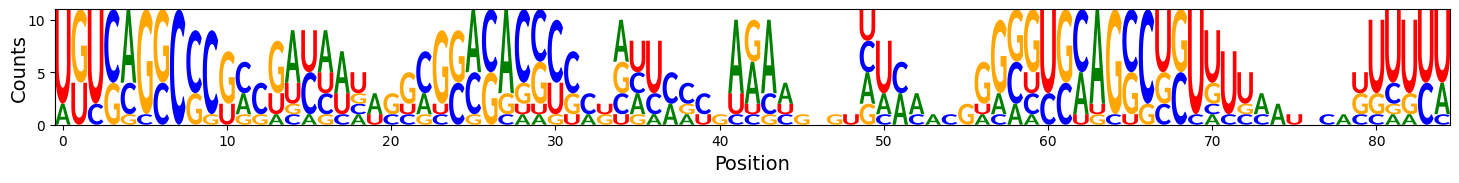

In [10]:
#Creating Counts Sequence Logo

import logomaker
from Bio import AlignIO

sequences = seqs
alignment_df = logomaker.alignment_to_matrix(sequences)

logo = logomaker.Logo(alignment_df, figsize=(18,1.5), font_name='Carlito', color_scheme="classic")

logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("Counts", labelpad=-1,fontsize=14)

In [11]:
#
!mlocarna {seqs_strc_file}
!cat {seqs_strc_file}

mLocARNA --- multiple Local (and global) Alignment of RNA --- LocARNA 2.0.0


seq_06_13          UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUC-ACUCAAAAACUACAGAGGAUCAAGCCCCUCUUCAUUUUCA
seq_06_14          UUUGCGCCGCUCCGAC---AGGAGCCGAGUCAC-------------UGAAGACUCAAGGCGCUUUUCAUU----
seq_06_16          UUCGCGCCGGGCUGUU-----GCCCAGGAGCC--------AGAAGGGAAGGCUCCAAGGCGCUUCU-----UCA
seq_06_05          UGUCAGGCCCGC-UUCA--AUGCGGACACC-------------CUAAAUUCGGUGCAGCCUGUUUU---UUGUU
seq_06_03          UGUCAGCCCCGG-ACAA-----CGGACACCCCG-------ACACCAAAAGGGGUGCAGGCUGUUUU---UUUUA
seq_06_04          UGUCAGCCCCGA-------AAAAGGACACCC-----------AUUAGACAGGGUGCAGGCUGUUUU---UU---
seq_06_15          UGUCAGGCCCUGGGCUC--ACCAGGACACGG-----------GACAAGAACCGUGCAGCCUGUUUU---UU---
seq_05_29          AGUCAGGCCCGACUUCUCU-GUCGGCCACGAUC--------UGGUGUCGAUCGUGCUGCCUGUGAAUCACCCC-
seq_06_12          UUCGCCGCCCGAUGCU------AGGAGGGGUGCGGUUCGUAUAUCAACGUGCCCCAAGCGGCCACC--AUAUCU
seq_06_17          AGUCAGGCC-----------------CACGUC----ACCC-----UUCAGACGUGCU

Text(0, 0.5, 'Counts')

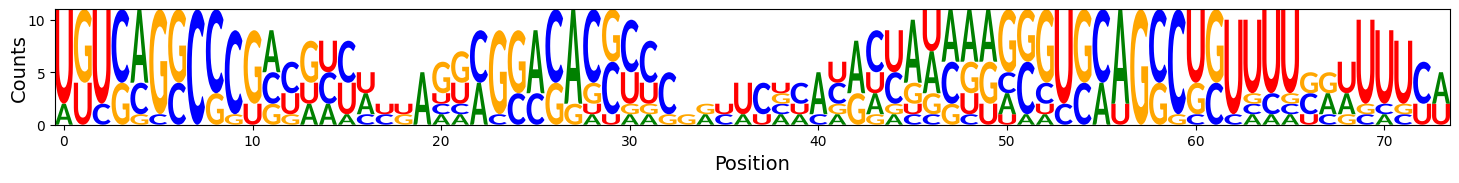

In [12]:
#Creating Counts Sequence Logo
import logomaker
from Bio import AlignIO

alignment = AlignIO.read('/scr/aldea/kgutenbrunner/working/xrRNA_design/MBFV_design/seqs/seqs_struct.out/results/result.aln', "clustal")

sequences = [str(record.seq) for record in alignment]
alignment_df = logomaker.alignment_to_matrix(sequences)

logo = logomaker.Logo(alignment_df, figsize=(18,1.5), font_name='Carlito', color_scheme="classic")

logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("Counts", labelpad=-1,fontsize=14)

Text(0, 0.5, 'Counts')

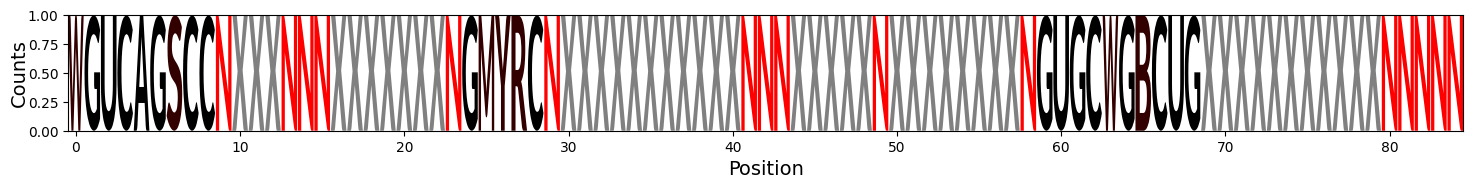

In [13]:
#Creating Counts Sequence Logo
color_scheme = {
    'UCAG' : [0, 0, 0],
    'WSMYRB' : [0.2, 0, 0],
    'X' : [0.5, 0.5, 0.5],
    'N' : [1, 0, 0],
}
iupac_cons = ['WGUCAGSCCNXXXNNNXXXXXXXNGMYRCNXXXXXXXXXXXNNNXXXXXNXXXXXXXXNGUGCWGBCUGXXXXXXXXXXXNNNNN']
alignment_df = logomaker.alignment_to_matrix(iupac_cons)
logo = logomaker.Logo(alignment_df, figsize=(18,1.5), font_name='Carlito', color_scheme=color_scheme)
logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("Counts", labelpad=-1,fontsize=14)

comparing the designed sequences with constraints

In [18]:
iupac_cons= 'WGUCAGGCCXXXXNNNXXXXXXXXGCYACNXXXXXXXXXXXNNNXXXXXNXXXXXXXXNGUGCWGBCUGXXXXXXXXXXXNNNNN'
db =     r'[[.((((((((((.......))))).((((((((.......{{{{{{{{.....))))))))]])))))......}}}}}}}}..'
seq_06_12 = 'UUCGCCGCCC---GAUGCUA---GGAGGGGUGCGGUUCGU-AUA-----UCAA-CGUGCCCCAAGCGGCCACCA------UAUCU'
seq_06_13 = 'UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUC-ACUCA--AAAA----CUACA-GAGGAUCAAGCCCCUCUUCA----UUUUCA'
seq_06_14='UUUGCGCCGCUCCGACA---GGAGCCGAGUC---AC-----UGA-----A-------GACUCAAGGCGCUUU--------UCAUU'
seq_06_15='UGUCAGGCCCUGGGCUCA--CCAGGACACGG---GACA---AGA-----A-------CCGUGCAGCCUGU----------UUUUU'
seq_06_16='UUCGCGCCGGGC-UGUU----GCCCAGGAGCC--AGA----AGG-----GAA----GGCUCCAAGGCGCUU---------CUUCA'
seq_06_17='AGUCAGGC-----------------CCACGUC---------ACCC----UUCA---GACGUGCUGCCUGUG--------GGGUUU'
seq_06_19='UGUCAGGC-----------------CCACCUC--UUUCCCGCACU----CU-----GAGGUGCAGCCUGUUUU------GGUGUU'


In [19]:
set(list(iupac_cons))

{'A', 'B', 'C', 'G', 'N', 'U', 'W', 'X', 'Y'}

In [20]:
import matplotlib.pyplot as plt

# Define colors for nucleotides
colors = {
    'A': 'green',
    'U': 'red',
    'C': 'blue',
    'G': 'orange',
    '-': 'lightgray',  
    'N': 'black',
    'X': 'gray',
    'B': 'cyan',
    'W': 'brown',
    'Y': 'purple',
    '[': 'lightgray',
    ']': 'lightgray',
    '(': 'lightgray',
    ')': 'lightgray',
    '{': 'lightgray',
    '}': 'lightgray',
    '.': 'lightgray',
}



def plot_alignment(sequences, names = False, height=None):
    # width = len(sequences)/2)-0.2
    if not height:
        height = len(sequences) /2 + 0.1
    fig, ax = plt.subplots(figsize=(26, height))
    seq_len = len(sequences[0])

    if not names:
        names = [f'Seq{i}' for i in range(len(sequences))]
    for i, seq in enumerate(sequences):
        for j, nt in enumerate(seq):
            ax.text(j-0.25, i-0.15, nt, fontsize=14, color='black', font='monospace', bbox=dict(facecolor=colors[nt], 
            alpha=0.55))
        # ax.text(j*2.45, i, nt, fontsize=14, color='black', font='monospace', bbox=dict(facecolor=colors[nt], alpha=0.5))
    ax.set_yticks(list(range(len(sequences))))

    ax.set_yticklabels(names)
    ax.set_xticks(range(seq_len))
    ax.set_xlim(-1, seq_len)
    ax.set_ylim(-1, len(sequences))
    ax.tick_params(bottom=False, left=False)
    plt.show()



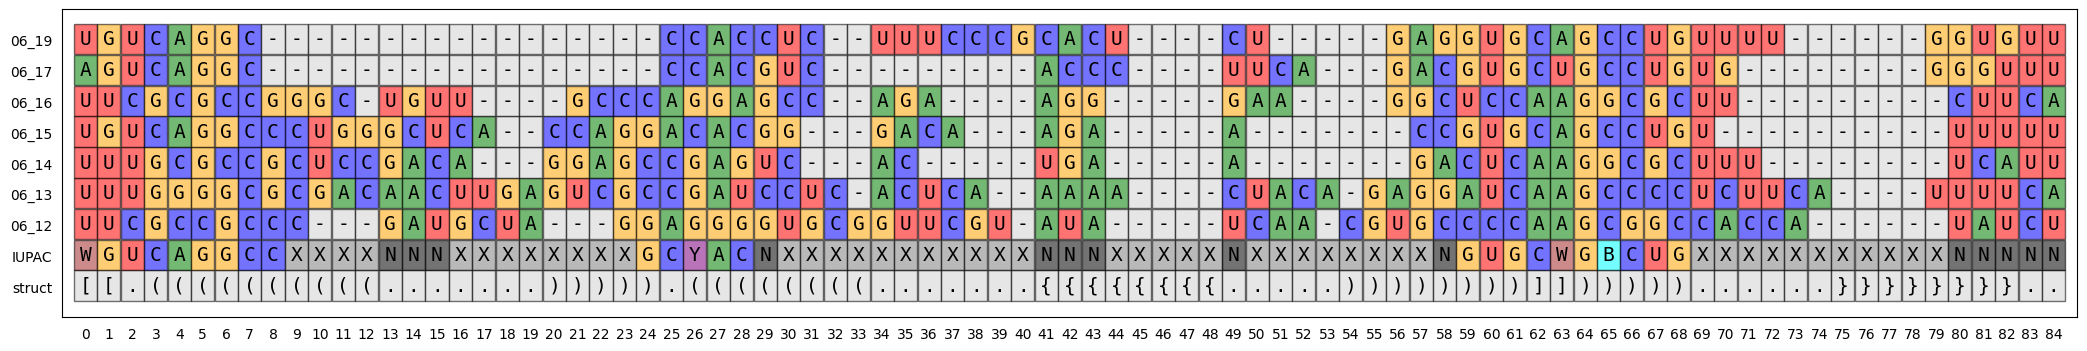

In [21]:
plot_alignment([db, iupac_cons, seq_06_12, seq_06_13, seq_06_14, seq_06_15, seq_06_16, seq_06_17, seq_06_18], names=['struct','IUPAC', '06_12', '06_13', '06_14', '06_15', '06_16', '06_17', '06_19'], height=4)

sequences

In [1]:
iupac_cons= 'WGUCAGGCCXXXXNNNXXXXXXXXGCYACNXXXXXXXXXXXNNNXXXXXNXXXXXXXXNGUGCWGBCUGXXXXXXXXXXXNNNNN'
db =     r'[[.((((((((((.......))))).((((((((.......{{{{{{{{.....))))))))]])))))......}}}}}}}}..'
seq_05_29 = 'AGUCAGGCCCGAC-UUCUCU--GUCGGCCACGAUC-U--------G-GUGUC-----GAUCGUGCUGCCUGUGAAU-CAC-C-CC'
seq_06_03 = 'UGUCAGCCCCG--GACAA----CGGACACCCC--GACACC-AAA-----A------GGGGUGCAGGCUGUUUU-------UUUUA'
seq_06_04= 'UGUCAGCCCC---GAAAAA----GGACACCC---AUU----AGA-----CA------GGGUGCAGGCUGU----------UUUUU'
seq_06_05= 'UGUCAGGCCCGC-UUCAAU--GCGGACACC----C------UAAA----UUC------GGUGCAGCCUGUUU-------UUUGUU'


In [2]:
set(list(iupac_cons))

{'A', 'B', 'C', 'G', 'N', 'U', 'W', 'X', 'Y'}

In [3]:
import matplotlib.pyplot as plt

# Define colors for nucleotides
colors = {
    'A': 'green',
    'U': 'red',
    'C': 'blue',
    'G': 'orange',
    '-': 'lightgray',  
    'N': 'black',
    'X': 'gray',
    'B': 'cyan',
    'W': 'brown',
    'Y': 'purple',
    '[': 'lightgray',
    ']': 'lightgray',
    '(': 'lightgray',
    ')': 'lightgray',
    '{': 'lightgray',
    '}': 'lightgray',
    '.': 'lightgray',
}



def plot_alignment(sequences, names = False, height=None):
    # width = len(sequences)/2)-0.2
    if not height:
        height = len(sequences) /2 + 0.1
    fig, ax = plt.subplots(figsize=(26, height))
    seq_len = len(sequences[0])

    if not names:
        names = [f'Seq{i}' for i in range(len(sequences))]
    for i, seq in enumerate(sequences):
        for j, nt in enumerate(seq):
            ax.text(j-0.25, i-0.15, nt, fontsize=14, color='black', font='monospace', bbox=dict(facecolor=colors[nt], 
            alpha=0.55))
        # ax.text(j*2.45, i, nt, fontsize=14, color='black', font='monospace', bbox=dict(facecolor=colors[nt], alpha=0.5))
    ax.set_yticks(list(range(len(sequences))))

    ax.set_yticklabels(names)
    ax.set_xticks(range(seq_len))
    ax.set_xlim(-1, seq_len)
    ax.set_ylim(-1, len(sequences))
    ax.tick_params(bottom=False, left=False)
    plt.show()



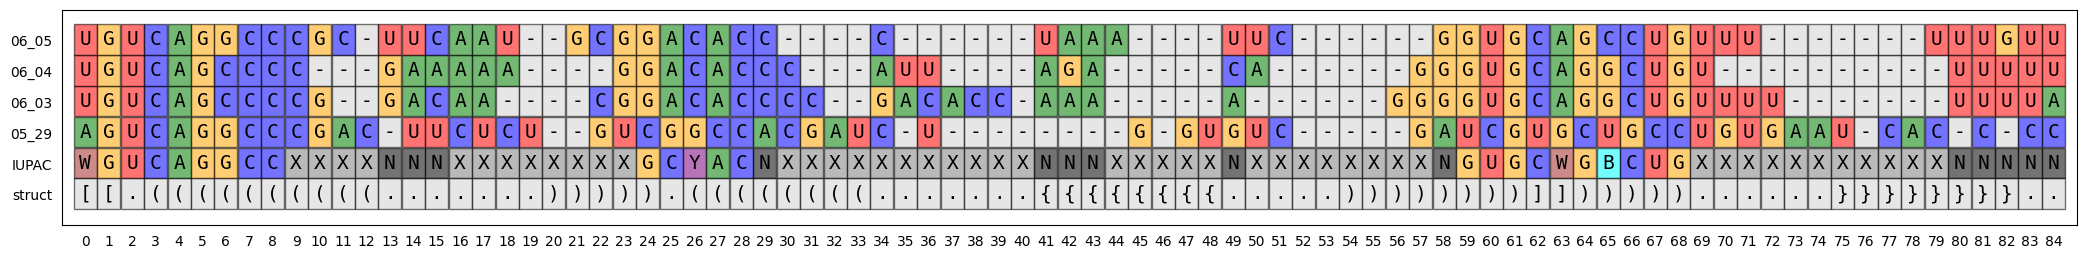

In [9]:
plot_alignment([db, iupac_cons, seq_05_29, seq_06_03, seq_06_04, seq_06_05], names=['struct','IUPAC', '05_29', '06_03', '06_04', '06_05'], height= 2.8)

### target-frequency control

In [2]:
freq_file = ('/scr/aldea/kgutenbrunner/working/xrRNA_design/MBFV_design/imgs/freqs.csv')
freq_df = pd.read_csv(freq_file, delimiter=';')

In [3]:
freq_df

,sequence,frequencies
0,UGUCAGCCCC---UAAUU-----GGACACGAAC-CCAAGUAAAA--...,"[2.410917763563453e-12, 2.410917763563453e-12,..."
1,AGUCAGGCCG---GAUUACG---CGACACCGACCCCUG---CAUA-...,"[5.945914838912427e-16, 1.0482608321680233e-15..."
2,UGUCAGCCCC---GUAAA-----GGACACAGCACCAC----CUUUU...,"[1.825232773389634e-15, 4.140450700697319e-15,..."
3,UGUCAGCCCC---GAAGA-----GGACACGGGACAACGCAUUUAG-...,"[1.2716841703991363e-16, 1.2716841703991363e-1..."
4,UGUCAGGCCC---UGUUAGU---GGACACCUGUGACGU---UGUAA...,"[3.8090320389173536e-11, 3.8090320389173536e-1..."
5,AGUCAGGCCAC--UUCCAUU--GUGACACAGAA-GAAAC--CGAUU...,"[1.4620234040666693e-15, 1.4620234040666693e-1..."
6,UGUCAGGCC----AUUACC-----GACACUGUAGC------CUUAU...,"[4.71868900678655e-10, 1.231861165759148e-08, ..."
7,AGUCAGCCC----UCAAU------GACACGGGAAUUAU---CUAGG...,"[2.2545986391548763e-08, 2.2545986391548763e-0..."
8,UGUCAGGCC----AGUCUAC----GACACCUGGGCUCGCU-UUUUU...,"[5.016822992900834e-09, 5.016822992900834e-09,..."
9,AGUCAGGCCCAGCGAAGGA-GCUGGACACGAGGCCUUUC--AUUUC...,"[1.050816846703632e-08, 1.050816846703632e-08,..."


In [4]:
def frequency_to_list(df_row):
    freq_list = df_row['frequencies']
    freq_list = freq_list[1:-1].split(', ')
    freq_list = [float(i) for i in freq_list]
    return freq_list

In [5]:
freqs= [(frequency_to_list(freq_df.iloc[i]), i) for i in range(len(freq_df)) ]

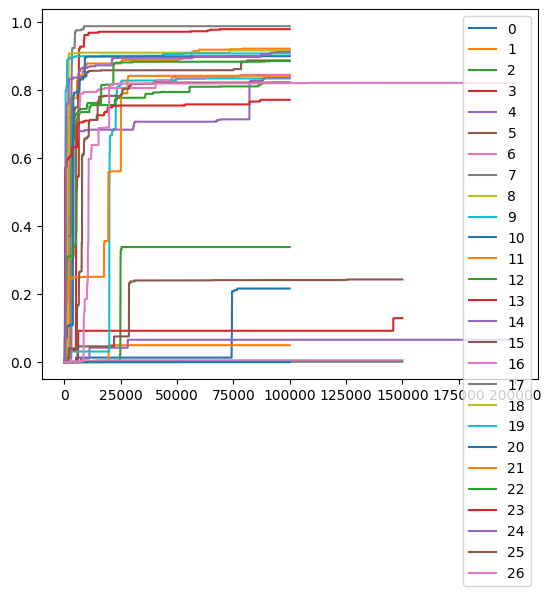

In [6]:
for freq in freqs:
    plt.plot(freq[0], label=freq[1])
    leg = plt.legend(loc='upper right')
plt.show()

In [415]:
freq_df['sequence']

0     UGUCAGCCCC---UAAUU-----GGACACGAAC-CCAAGUAAAA--...
1     AGUCAGGCCG---GAUUACG---CGACACCGACCCCUG---CAUA-...
2     UGUCAGCCCC---GUAAA-----GGACACAGCACCAC----CUUUU...
3     UGUCAGCCCC---GAAGA-----GGACACGGGACAACGCAUUUAG-...
4     UGUCAGGCCC---UGUUAGU---GGACACCUGUGACGU---UGUAA...
5     AGUCAGGCCAC--UUCCAUU--GUGACACAGAA-GAAAC--CGAUU...
6     UGUCAGGCC----AUUACC-----GACACUGUAGC------CUUAU...
7     AGUCAGCCC----UCAAU------GACACGGGAAUUAU---CUAGG...
8     UGUCAGGCC----AGUCUAC----GACACCUGGGCUCGCU-UUUUU...
9     AGUCAGGCCCAGCGAAGGA-GCUGGACACGAGGCCUUUC--AUUUC...
10    UGUCAGGCC----UUAGAA-----GCCACGUGUUGGCAA--AAAGU...
11    UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUC-ACUCA--AAAA-...
12    AGUCAGGCCCGGCGAAAAAAGCCGGCCACGCGUCUCUACGCUUU--...
13    UUUGCGCCGCUCCGACA---GGAGCCGAGUC---AC-----UGA--...
14    AGUCAGGCCCCAGGAGAAA-CUGGGCCACGUUC-C------UUUA-...
15    UGUCAGGCCCUGGGCUCA--CCAGGACACGG---GACA---AGA--...
16    AGUCAGGCCCAUGGAAGAA-CAUGGCCACGUC--A------CCG--...
17    UUCGCGCCGGGC-UGUU----GCCCAGGAGCC--AGA----A

In [416]:
[round(freq[0][-1],2) for freq in freqs]

[0.22,
 0.05,
 0.34,
 0.13,
 0.07,
 0.24,
 0.01,
 0.0,
 0.0,
 0.83,
 0.0,
 0.92,
 0.82,
 0.98,
 0.84,
 0.89,
 0.84,
 0.99,
 0.92]

### AROA virus without beta stem

In [10]:
# normal seq and ss
seq = 'agucaggccagaaaugccaccggauaaagguagacggugcugccugcaaccuuucu'
ss = ['...(((((((....)).(((((............)))))..)))))..........'
      '.........................((((((.................))))))..'
      '((.....................................))...............']

In [22]:
# without beta stem seq and ss

seq = 'agucaggcc      gccaccggauaaagguagacggugcugccugcaaccuuucu'
ss = ['...((((((      ).(((((............)))))..)))))..........'
      '.........      ..........((((((.................))))))..'
      '((.......      ........................))...............']

seq = 'agucaggccgccaccggauaaagguagacggugcugccugcaaccuuucu'
ss = ['...(((((...(((((............)))))..)))))..........',
      '...................((((((.................))))))..',
      '((...............................))...............',]

In [23]:
for i in ss:
    print(i)

...(((((...(((((............)))))..)))))..........
...................((((((.................))))))..
((...............................))...............


In [1]:
import RNA

In [2]:
seq_06_12 = 'UUCGCCGCCC---GAUGCUA---GGAGGGGUGCGGUUCGU-AUA-----UCAA-CGUGCCCCAAGCGGCCACCA------UAUCU'
seq_06_13 = 'UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUC-ACUCA--AAAA----CUACA-GAGGAUCAAGCCCCUCUUCA----UUUUCA'
seq_06_14='UUUGCGCCGCUCCGACA---GGAGCCGAGUC---AC-----UGA-----A-------GACUCAAGGCGCUUU--------UCAUU'
seq_06_15='UGUCAGGCCCUGGGCUCA--CCAGGACACGG---GACA---AGA-----A-------CCGUGCAGCCUGU----------UUUUU'
seq_06_16='UUCGCGCCGGGC-UGUU----GCCCAGGAGCC--AGA----AGG-----GAA----GGCUCCAAGGCGCUU---------CUUCA'
seq_06_17='AGUCAGGC-----------------CCACGUC---------ACCC----UUCA---GACGUGCUGCCUGUG--------GGGUUU'
seq_06_19='UGUCAGGC-----------------CCACCUC--UUUCCCGCACU----CU-----GAGGUGCAGCCUGUUUU------GGUGUU'
seq_07_02='UGUCAGGCCCGC-GAUUA---GCGGCCACCCUC-GAC----AGA-----AA----GAGGGUGCAGCCUGU----------UUUUU'
seq_07_08='AGUCAGGCCCGG-UUAGU---CCGGCCACCGGUAUCCCUUCCUCCA---U----UACCGGUGCUGCCUG---------UGGAGAA'

In [3]:
def remove_positioned_gaps(sequence, structure):
    remove = [i for i, nt in enumerate(sequence) if nt == '-']
    new_ss = [structure[i] for i in range(len(structure)) if i not in remove]
    return ''.join(new_ss)


In [4]:
xrRNA_structures = ['...((((((((((.......))))).((((((((....................))))))))..)))))................',
		      '((............................................................)).....................',
		      '.........................................((((((((..........................))))))))..']

In [6]:
seqs = [seq_06_12, seq_06_13, seq_06_14, seq_06_15, seq_06_16, seq_06_17, seq_06_19, seq_07_02, seq_07_08]
seqs_name = ['seq_06_12', 'seq_06_13', 'seq_06_14', 'seq_06_15', 'seq_06_16', 'seq_06_17', 'seq_06_19', 'seq_07_02', 'seq_07_08']

In [8]:
for i, seq in enumerate(seqs):
    strucs = [remove_positioned_gaps(seq, ss) for ss in xrRNA_structures]
    seq = seq.replace('-', '')
    fc = RNA.fold_compound(seq)
    pk1_e = fc.eval_structure(strucs[1])
    pk2_e = fc.eval_structure(strucs[2])
    ss, mfe = fc.pf()
    print(seqs_name[i])
    print(seq)
    print(ss)
    print(strucs[2])
    print(mfe)
    print(pk1_e)
    print(pk2_e, '\n')

seq_06_12
UUCGCCGCCCGAUGCUAGGAGGGGUGCGGUUCGUAUAUCAACGUGCCCCAAGCGGCCACCAUAUCU
...(((((((.......)).((((((((.............))))))))..)))))..........
..................................(((........................)))..
-23.51339340209961
6.880000114440918
4.900000095367432 

seq_06_13
UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUCACUCAAAAACUACAGAGGAUCAAGCCCCUCUUCAUUUUCA
...((((((((((.......))))).(((((((..............)))))))..)))))............
......................................((((.........................))))..
-26.15068244934082
6.989999771118164
4.5 

seq_06_14
UUUGCGCCGCUCCGACAGGAGCCGAGUCACUGAAGACUCAAGGCGCUUUUCAUU
...((((((((((....))))).(((((......)))))..)))))........
..............................(((................)))..
-24.213491439819336
6.619999885559082
1.7000000476837158 

seq_06_15
UGUCAGGCCCUGGGCUCACCAGGACACGGGACAAGAACCGUGCAGCCUGUUUUUU
...((((((((((.....))))).(((((........)))))..)))))......
.................................(((..............)))..
-23.274322509765625
4.510000228881836
4.30000

In [35]:
seq = 'AGUCAGGCCGGG-UCC-----CCCGCCACGUGGAG------CCCU----UA---UCCGCGUGCUGCCUGU---------AGGGAA'
strucs = [remove_positioned_gaps(seq, ss) for ss in xrRNA_structures]
seq = seq.replace('-', '')
fc = RNA.fold_compound(seq)

pk2_e = fc.eval_structure(strucs[2])
ss, mfe = fc.pf()
freq = round(fc.pr_structure(strucs[0]),3)
ef = fc.ensemble_defect(strucs[0])
print(seq)
print(ss)
print(strucs[0])
print(strucs[1])
print(strucs[2])
print('freq', freq)
print('ef', ef)
print('mfe',mfe)
print('pk2', pk2_e, '\n')

AGUCAGGCCGGGUCCCCCGCCACGUGGAGCCCUUAUCCGCGUGCUGCCUGUAGGGAA
...(((((((((...)))).((((((((.......))))))))..))))).......
...(((((((((...)))).((((((((.......))))))))..))))).......
((.........................................))............
.............................((((..................))))..
freq 0.576
ef 0.031469285844256366
mfe -22.639493942260742
pk2 -3.799999952316284 



In [36]:
seq

'AGUCAGGCCGGGUCCCCCGCCACGUGGAGCCCUUAUCCGCGUGCUGCCUGUAGGGAA'

AGUCAGGCCGGGUCCCCCGCCACGUGGAGCCCUUAUCCGCGUGCUGCCUGUAGGGAA
...(((((((((...)))).((((((((.......))))))))..)))))....... (-22.30)
...(((((((((...)))).((((((((.......))))))))..)))))....... [-22.64]
...(((((((((...)))).((((((((.......))))))))..)))))....... {-22.30 d=1.12}
...(((((((((...)))).((((((((.......))))))))..)))))....... {-22.30 MEA=55.21}
 frequency of mfe structure in ensemble 0.576465; ensemble diversity 1.95  
convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `dot.png' @ warning/png.c/MagickPNGWarningHandler/1669.


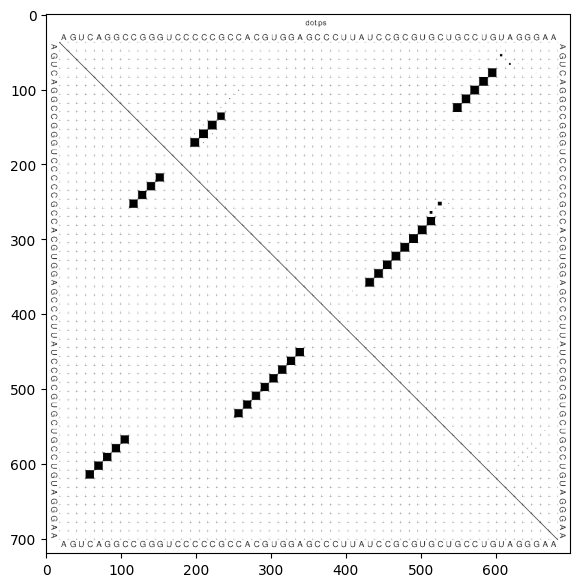

In [37]:

!echo $seq > test.seq
!RNAfold -p --MEA < test.seq
!convert dot.ps dot.png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("dot.png")
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image)

In [37]:
import pandas as pd
import numpy as np
metric_csv = '/scr/aldea/kgutenbrunner/working/analysis/outputs/MBFV/output/result.csv'
df = pd.read_csv(metric_csv)

In [11]:
df

,Unnamed: 0,Name,RMSD,p-value,DI_ALL,INF_ALL,INF_WC,INF_NWC,INF_STACK,CAD-Score,TM-score to ref,TM-score to pred,MCQ
0,0,05_29_clust01_qrna,15.755922,5.240678e-05,50.994711,0.308972,0.000000,-1.000000,0.466294,0.032805,0.32805,0.33030,21.76
1,1,06_03_clust01_qrna,9.923540,1.056326e-10,26.315418,0.377100,0.346410,0.000000,0.447523,0.070330,0.29729,0.30266,25.09
2,2,06_15_clust01_qrna,8.649103,1.365480e-11,20.933666,0.413167,0.300376,-1.000000,0.483651,0.045446,0.30750,0.32467,22.49
3,3,06_16_clust01_qrna,6.072184,1.110223e-16,9.986825,0.608019,0.762770,0.408248,0.538462,0.084503,0.28620,0.27860,21.89
4,4,06_17_clust01_qrna,19.230088,7.899652e-01,69.382390,0.277161,0.000000,0.000000,0.419355,0.038156,0.23662,0.25280,21.84
5,5,07_02_clust01_qrna,9.103911,1.226774e-11,27.455561,0.331587,0.000000,-1.000000,0.503260,0.116604,0.29054,0.30984,21.52
6,6,07_08_clust01_qrna,19.355848,2.259734e-02,60.503154,0.319915,0.000000,0.000000,0.484774,0.080715,0.29383,0.30378,23.66
7,7,07_10_clust01_qrna,7.290127,7.716050e-15,19.577495,0.372373,0.279751,0.000000,0.439548,0.124407,0.29015,0.30130,22.61
8,8,ef_test_clust01_qrna,6.855948,7.766010e-14,16.692510,0.410720,0.211702,0.000000,0.532714,0.024714,0.28797,0.28562,25.67


In [58]:
df_num = df.copy()
df_num =df_num.drop(columns=['Unnamed: 0'])


In [59]:
df_num

,Name,RMSD,p-value,DI_ALL,INF_ALL,INF_WC,INF_NWC,INF_STACK,CAD-Score,TM-score to ref,TM-score to pred,MCQ
0,05_29_clust01_qrna,15.755922,5.240678e-05,50.994711,0.308972,0.000000,-1.000000,0.466294,0.032805,0.32805,0.33030,21.76
1,06_03_clust01_qrna,9.923540,1.056326e-10,26.315418,0.377100,0.346410,0.000000,0.447523,0.070330,0.29729,0.30266,25.09
2,06_15_clust01_qrna,8.649103,1.365480e-11,20.933666,0.413167,0.300376,-1.000000,0.483651,0.045446,0.30750,0.32467,22.49
3,06_16_clust01_qrna,6.072184,1.110223e-16,9.986825,0.608019,0.762770,0.408248,0.538462,0.084503,0.28620,0.27860,21.89
4,06_17_clust01_qrna,19.230088,7.899652e-01,69.382390,0.277161,0.000000,0.000000,0.419355,0.038156,0.23662,0.25280,21.84
5,07_02_clust01_qrna,9.103911,1.226774e-11,27.455561,0.331587,0.000000,-1.000000,0.503260,0.116604,0.29054,0.30984,21.52
6,07_08_clust01_qrna,19.355848,2.259734e-02,60.503154,0.319915,0.000000,0.000000,0.484774,0.080715,0.29383,0.30378,23.66
7,07_10_clust01_qrna,7.290127,7.716050e-15,19.577495,0.372373,0.279751,0.000000,0.439548,0.124407,0.29015,0.30130,22.61
8,ef_test_clust01_qrna,6.855948,7.766010e-14,16.692510,0.410720,0.211702,0.000000,0.532714,0.024714,0.28797,0.28562,25.67


In [60]:
df_num.style.background_gradient(axis=0)

,Name,RMSD,p-value,DI_ALL,INF_ALL,INF_WC,INF_NWC,INF_STACK,CAD-Score,TM-score to ref,TM-score to pred,MCQ
0,05_29_clust01_qrna,15.755922,0.000052,50.994711,0.308972,0.000000,-1.000000,0.466294,0.032805,0.328050,0.330300,21.760000
1,06_03_clust01_qrna,9.923540,0.000000,26.315418,0.377100,0.346410,0.000000,0.447523,0.070330,0.297290,0.302660,25.090000
2,06_15_clust01_qrna,8.649103,0.000000,20.933666,0.413167,0.300376,-1.000000,0.483651,0.045446,0.307500,0.324670,22.490000
3,06_16_clust01_qrna,6.072184,0.000000,9.986825,0.608019,0.762770,0.408248,0.538462,0.084503,0.286200,0.278600,21.890000
4,06_17_clust01_qrna,19.230088,0.789965,69.382390,0.277161,0.000000,0.000000,0.419355,0.038156,0.236620,0.252800,21.840000
5,07_02_clust01_qrna,9.103911,0.000000,27.455561,0.331587,0.000000,-1.000000,0.503260,0.116604,0.290540,0.309840,21.520000
6,07_08_clust01_qrna,19.355848,0.022597,60.503154,0.319915,0.000000,0.000000,0.484774,0.080715,0.293830,0.303780,23.660000
7,07_10_clust01_qrna,7.290127,0.000000,19.577495,0.372373,0.279751,0.000000,0.439548,0.124407,0.290150,0.301300,22.610000
8,ef_test_clust01_qrna,6.855948,0.000000,16.692510,0.410720,0.211702,0.000000,0.532714,0.024714,0.287970,0.285620,25.670000


In [39]:
csv = '/scr/aldea/kgutenbrunner/working/xrRNA_design/MBFV_design/testing_obj.csv'
df = pd.read_csv(csv)
df

,Unnamed: 0,objective_function,steps,sequence,frequency,ensemble_defect,pk2_energy
0,0,frequency,50000,AGUCAGGCCU---GUCCCAG---AGCUACU----CGGUUU-GGGGU...,0.000,0.104,-8.0
1,1,frequency,50000,UGUCAGGCC----UACUUAG----GCUACAG---UG-----GGGG-...,0.000,0.278,-6.9
2,2,frequency,50000,UGUCAGGCCGGAUUCU----AUUCGCUACGUGG-UG-----GGGG-...,0.020,0.316,-5.1
3,3,frequency,50000,AGUCAGGCC----CGAGG------GCCACG----CGA----CCGGA...,0.000,0.655,-13.3
4,4,frequency,50000,UGUCAGGCCUUG-GAAAGA--CGAGCCACGUGA-UA-----AGGG-...,0.607,0.057,-3.4
5,5,ensemble_defect,50000,AGUCAGGCC----UUUAUU-----GCCACCGCG--------CCC--...,0.009,0.064,-2.9
6,6,ensemble_defect,50000,AGUCAGGCC----GAAUUU-----GCCACUCGA--------CCC--...,0.002,0.067,-3.2
7,7,ensemble_defect,50000,UGUCAGGCC----GAUUA------GCCACGGA--GAU----GGGGA...,0.003,0.082,-4.3
8,8,ensemble_defect,50000,AGUCAGGCC----GAUUAU-----GCCACCGU--GA-----CCC--...,0.001,0.076,-3.5
9,9,ensemble_defect,50000,AGUCAGGCCGG--GAAUA----CCGCCACGGGU-UA-----CCC--...,0.557,0.049,-3.2


In [42]:
df_num = df.copy()
df_num =df_num.drop(columns=['Unnamed: 0', 'sequence', 'pk2_energy'])
df_num['ensemble_defect'] = - df_num['ensemble_defect'] 
df_num.style.background_gradient(axis=0)

,objective_function,steps,frequency,ensemble_defect
0,frequency,50000,0.000000,-0.104000
1,frequency,50000,0.000000,-0.278000
2,frequency,50000,0.020000,-0.316000
3,frequency,50000,0.000000,-0.655000
4,frequency,50000,0.607000,-0.057000
5,ensemble_defect,50000,0.009000,-0.064000
6,ensemble_defect,50000,0.002000,-0.067000
7,ensemble_defect,50000,0.003000,-0.082000
8,ensemble_defect,50000,0.001000,-0.076000
9,ensemble_defect,50000,0.557000,-0.049000


How much of the sequence is random? <br>

length:
- alpha = 10 nts
- beta = 7 - 15 nts
- gamma = 20 - 23 nts
- PK1 = 4 nts
- PK2 = 6 - 16 nts
- until PK2 = 0 - 6 nts
- after PK2 2

how length without constraints:
- ss = 3 + alpha-1 + beta + 1 + gamma + 2 + alpha-2 + until PK2 + PK2 + 2
- min = 3 + 5 + 7 + 1 + 20 + 2 +5 + 0 + 3 + 2 = 48
- max = 3 + 5 + 15 + 1 + 23 + 2 + 5 + 6 + 8 + 2 = 70

with constraint
- 52 - 70 -> should look that up idk where i have that from

In [ ]:
# 11-AAAAABBBBBBBBBBBBBBBBB-GGGGGGGGGGGGGGG22222222GGGGGGGGGGGGG11AAAAA------22222222--
# WGUCAGGCCXXXXNNNXXXXXXXXGCYACNXXXXXXXXXXXNNNXXXXXNXXXXXXXXNGUGCWGCCUGXXXXXXXXXXXNNNNN
# ...((((((((((.......))))).((((((((....................))))))))..)))))................
# ((............................................................)).....................
# .........................................((((((((..........................))))))))..

In [4]:
seq = 'WGUCAGGCCXXXXNNNXXXXXXXXGCYACNXXXXXXXXXXXNNNXXXXXNXXXXXXXXNGUGCWGCCUGXXXXXXXXXXXNNNNN'

In [13]:
N = seq.count('N')
X = seq.count('X')
ACGU = seq.count('A') + seq.count('C') + seq.count('G') + seq.count('U')
WY = seq.count('W') + seq.count('Y')

In [16]:
print(N, X, ACGU, WY)

14 47 21 3


In [15]:
fixed = ACGU
variable = N + X

In [34]:
randomness_all = ((N + X) + WY * 0.5)/ len(seq)
randomness_all_ = ((N + X))/ len(seq)

In [35]:
randomness_all

0.7352941176470589

In [43]:
randomness_all_

0.7176470588235294